In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from preprocessing import data_preprocessing
from preprocessing import transf_data_preprocessing

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)
pd.set_option('mode.chained_assignment',  None)

plt.rc('font',family='malgun gothic')

smart_card_data = pd.read_csv('./data/smart_card_data.csv')
getrouteinfoall = pd.read_csv('./data/getRouteInfoAll.csv', encoding = 'cp949', index_col = 0)
getstationbyrouteall = pd.read_csv('./data/getStationByRouteAll.csv', encoding = 'cp949', index_col = 0)
bus_sttn = pd.read_csv('./data/bus_sttn.csv')
route_curve = pd.read_csv('./data/route_curve.csv', encoding = 'cp949')

### getrouteinfoall
getrouteinfoall_df = getrouteinfoall[['ROUTE_CD','ROUTE_NO']] 

### bus_sttn
bus_sttn_df = bus_sttn[['bus_sttn_id', 'posx', 'posy']]

In [2]:
from preprocessing import data_preprocessing

smart_card_data = data_preprocessing.smart_card_preprocessing(smart_card_data)
smart_card_data.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,YSR_CNT,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,WEEKDAY,DAY
0,541463722,680,0,30300052,1,8002432,8001526,1,1250,0,2022-04-01 08:17:06,2022-04-01 08:30:41,4,1
1,540104832,675,0,30300083,1,8001279,8001538,1,1250,0,2022-04-01 09:25:42,2022-04-01 09:37:29,4,1
2,608695670,673,1,30300003,1,8001777,8007023,1,0,0,2022-04-01 19:12:53,2022-04-01 19:21:42,4,1


In [3]:
df_0425 = smart_card_data[smart_card_data['DAY'] == 25]
df_0425.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,YSR_CNT,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,WEEKDAY,DAY
169539,734471053,675,0,30300059,1,8006006,8001930,1,1250,0,2022-04-25 19:19:47,2022-04-25 19:38:02,0,25
169540,661607970,676,0,30300070,1,8002794,8002155,1,1250,0,2022-04-25 07:53:58,2022-04-25 08:16:20,0,25
169541,706749254,675,0,30300079,1,8001721,8002802,1,1250,0,2022-04-25 08:07:51,2022-04-25 08:39:44,0,25


In [4]:
print(smart_card_data.shape, df_0425.shape)

(6953536, 14) (337708, 14)


# 환승

## 환승횟수 2회

In [5]:
df_transf_2 = transf_data_preprocessing.transf_2_preprocessing(df_0425)
df_transf_2.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,YSR_CNT,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,WEEKDAY,DAY
12915,91469941,676,0,30300087,1,8002966,8002279,1,1250,0,2022-04-25 06:10:32,2022-04-25 06:19:40,0,25
12916,91469941,675,1,30300053,1,8002276,8002965,1,0,0,2022-04-25 10:39:37,2022-04-25 10:48:07,0,25
12917,91469941,676,2,30300087,1,8002965,8001494,1,0,0,2022-04-25 11:12:54,2022-04-25 11:16:08,0,25


In [6]:
df_transf_merge_2 = transf_data_preprocessing.transf_2_merge(df_transf_2, getrouteinfoall_df, bus_sttn_df)
df_transf_merge_2.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2,TR_MEANS_TYPE_3,ROUTE_NO_3,GETON_BUS_STTN_ID_3,GETON_PAY_3,GETON_DATETIME_3,GETOFF_BUS_STTN_ID_3,GETOFF_PAY_3,GETOFF_DATETIME_3,GETOFF_BUS_X_3,GETOFF_BUS_Y_3
0,91469941,676,703,0,8002966,1250,2022-04-25 06:10:32,36.322580,127.378260,8002279,0,2022-04-25 06:19:40,36.339160,127.392480,675,211,8002276,0,2022-04-25 10:39:37,36.337902,127.392494,8002965,0,2022-04-25 10:48:07,36.32283,127.377975,676,703,8002965,0,2022-04-25 11:12:54,8001494,0,2022-04-25 11:16:08,36.314710,127.37915
1,695425128,675,211,0,8002118,1250,2022-04-25 06:55:43,36.311165,127.376205,8002279,0,2022-04-25 07:13:50,36.339160,127.392480,676,102,8002974,0,2022-04-25 07:47:14,36.359620,127.319695,8002921,0,2022-04-25 07:52:32,36.35187,127.298140,675,113,8002920,1250,2022-04-25 15:34:50,8001494,0,2022-04-25 16:23:53,36.314710,127.37915
2,767896897,676,103,0,8001596,1250,2022-04-25 18:49:44,36.351994,127.346794,8001133,0,2022-04-25 19:06:42,36.335934,127.378746,675,113,8002914,0,2022-04-25 19:22:56,36.332237,127.383090,8002965,0,2022-04-25 19:28:11,36.32283,127.377975,675,119,8002965,0,2022-04-25 19:32:47,8001948,0,2022-04-25 19:40:29,36.317017,127.39268


### 환승 횟수 2회 데이터 분석

In [76]:
# 총 통행시간 계산
df_transf_merge_2['TRAVEL_TIME'] = df_transf_merge_2['GETOFF_DATETIME_3'] - df_transf_merge_2['GETON_DATETIME_1']

# 통행시간이 2시간 이내인 데이터를 필터링합니다.
filtered_data_trasnf_merge_2 = df_transf_merge_2[df_transf_merge_2['TRAVEL_TIME'] <= pd.Timedelta(hours=2)].reset_index(drop=True)
filtered_data_trasnf_merge_2 = filtered_data_trasnf_merge_2[filtered_data_trasnf_merge_2['GETON_PAY_3']==0]

In [78]:
filtered_data_trasnf_merge_2.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2,TR_MEANS_TYPE_3,ROUTE_NO_3,GETON_BUS_STTN_ID_3,GETON_PAY_3,GETON_DATETIME_3,GETOFF_BUS_STTN_ID_3,GETOFF_PAY_3,GETOFF_DATETIME_3,GETOFF_BUS_X_3,GETOFF_BUS_Y_3,TRAVEL_TIME
0,767896897,676,103,0,8001596,1250,2022-04-25 18:49:44,36.351994,127.346794,8001133,0,2022-04-25 19:06:42,36.335934,127.378746,675,113,8002914,0,2022-04-25 19:22:56,36.332237,127.383090,8002965,0,2022-04-25 19:28:11,36.32283,127.377975,675,119,8002965,0,2022-04-25 19:32:47,8001948,0,2022-04-25 19:40:29,36.317017,127.39268,0 days 00:50:45
1,719754931,675,316,0,8001868,1250,2022-04-25 17:38:23,36.322930,127.393830,8002453,0,2022-04-25 17:59:23,36.350600,127.378130,676,703,8006006,0,2022-04-25 18:30:54,36.350890,127.377860,8002119,0,2022-04-25 19:00:14,36.31170,127.376640,676,201,8002118,0,2022-04-25 19:29:19,8001948,0,2022-04-25 19:32:54,36.317017,127.39268,0 days 01:54:31
2,723292985,676,103,0,8001400,1250,2022-04-25 13:49:06,36.348350,127.450880,8001540,0,2022-04-25 14:17:53,36.326393,127.408005,675,614,8001928,0,2022-04-25 15:08:09,36.324894,127.409225,8002733,0,2022-04-25 15:11:43,36.32264,127.415110,675,613,8002733,0,2022-04-25 15:12:24,8001401,0,2022-04-25 15:33:58,36.348312,127.45116,0 days 01:44:52


## 환승횟수 1회

In [7]:
df_transf_1 = transf_data_preprocessing.transf_1_preprocessing(df_0425)
df_transf_1.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,YSR_CNT,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,WEEKDAY,DAY
90902,87781463,681,0,30300042,1,8002230,8002410,1,1250,0,2022-04-25 14:01:28,2022-04-25 14:25:01,0,25
90903,87781463,673,1,30300001,1,8002410,8002492,1,0,0,2022-04-25 14:28:07,2022-04-25 14:30:20,0,25
1420,90047997,675,0,30300058,1,8001086,8005894,1,1250,0,2022-04-25 10:16:21,2022-04-25 10:22:33,0,25


In [8]:
df_transf_merge_1 = transf_data_preprocessing.transf_1_merge(df_transf_1, getrouteinfoall_df, bus_sttn_df)
df_transf_merge_1.head(3)

,CARD_NO,TR_MEANS_TYPE_1,ROUTE_NO_1,TRANSF_CNT,GETON_BUS_STTN_ID_1,GETON_PAY_1,GETON_DATETIME_1,GETON_BUS_X_1,GETON_BUS_Y_1,GETOFF_BUS_STTN_ID_1,GETOFF_PAY_1,GETOFF_DATETIME_1,GETOFF_BUS_X_1,GETOFF_BUS_Y_1,TR_MEANS_TYPE_2,ROUTE_NO_2,GETON_BUS_STTN_ID_2,GETON_PAY_2,GETON_DATETIME_2,GETON_BUS_X_2,GETON_BUS_Y_2,GETOFF_BUS_STTN_ID_2,GETOFF_PAY_2,GETOFF_DATETIME_2,GETOFF_BUS_X_2,GETOFF_BUS_Y_2
0,87781463,681,107,0,8002230,1250,2022-04-25 14:01:28,36.329970,127.403660,8002410,0,2022-04-25 14:25:01,36.354330,127.339830,673,1,8002410,0,2022-04-25 14:28:07,36.35433,127.33983,8002492,0,2022-04-25 14:30:20,36.361187,127.33618
1,659850013,675,114,0,8005928,1250,2022-04-25 08:30:48,36.365158,127.335160,8002411,0,2022-04-25 08:35:44,36.354877,127.341520,675,912,8002410,0,2022-04-25 19:20:58,36.35433,127.33983,8002492,0,2022-04-25 19:24:41,36.361187,127.33618
2,742047106,675,119,0,8002432,1250,2022-04-25 10:10:05,36.317894,127.394745,8002412,0,2022-04-25 10:44:24,36.354378,127.342026,673,1,8002410,0,2022-04-25 10:57:34,36.35433,127.33983,8002492,0,2022-04-25 11:00:45,36.361187,127.33618


In [17]:
# 총 통행시간 계산
df_transf_merge_1['TRAVEL_TIME'] = df_transf_merge_1['GETOFF_DATETIME_2'] - df_transf_merge_1['GETON_DATETIME_1']

## 환승횟수 0회

In [9]:
df_transf_0 = transf_data_preprocessing.transf_0_preprocessing(df_0425)
df_transf_0.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,YSR_CNT,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,WEEKDAY,DAY
169539,734471053,675,0,30300059,1,8006006,8001930,1,1250,0,2022-04-25 19:19:47,2022-04-25 19:38:02,0,25
169544,745621784,676,0,30300073,1,8001576,8002148,1,1250,0,2022-04-25 18:17:49,2022-04-25 18:52:06,0,25
169545,771903902,676,0,30300037,1,8001590,8002997,1,1250,0,2022-04-25 08:37:12,2022-04-25 08:42:02,0,25


In [10]:
df_transf_merge_0 = transf_data_preprocessing.transf_0_merge(df_transf_0, getrouteinfoall_df, bus_sttn_df)
df_transf_merge_0.head(3)

,CARD_NO,TR_MEANS_TYPE,ROUTE_NO,TRANSF_CNT,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_BUS_X,GETON_BUS_Y,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_BUS_X,GETOFF_BUS_Y
0,734471053,675,315,0,8006006,1250,2022-04-25 19:19:47,36.35089,127.37786,8001930,0,2022-04-25 19:38:02,36.321213,127.41367
1,749862029,675,315,0,8006006,1250,2022-04-25 20:40:55,36.35089,127.37786,8001930,0,2022-04-25 20:55:01,36.321213,127.41367
2,743664439,675,315,0,8006006,1250,2022-04-25 21:18:19,36.35089,127.37786,8001930,0,2022-04-25 21:34:17,36.321213,127.41367


In [18]:
# 총 통행시간 계산
df_transf_merge_0['TRAVEL_TIME'] = df_transf_merge_0['GETOFF_DATETIME'] - df_transf_merge_0['GETON_DATETIME']

## 정리

In [11]:
print(df_transf_merge_2.shape, df_transf_merge_1.shape, df_transf_merge_0.shape)

(2067, 36) (17228, 26) (67741, 14)


# 분석

In [85]:
smart_card_data.drop(labels = ['WEEKDAY','DAY'], axis = 1, inplace=True)

In [88]:
smart_card_data['GETON_HOUR'] = smart_card_data['GETON_DATETIME'].dt.hour
smart_card_data['GETOFF_HOUR'] = smart_card_data['GETOFF_DATETIME'].dt.hour

In [89]:
smart_card_data.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,BUS_ROUTE_ID,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,YSR_CNT,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR
0,541463722,680,0,30300052,1,8002432,8001526,1,1250,0,2022-04-01 08:17:06,2022-04-01 08:30:41,8,8
1,540104832,675,0,30300083,1,8001279,8001538,1,1250,0,2022-04-01 09:25:42,2022-04-01 09:37:29,9,9
2,608695670,673,1,30300003,1,8001777,8007023,1,0,0,2022-04-01 19:12:53,2022-04-01 19:21:42,19,19


In [103]:
route_id = smart_card_data.merge(getrouteinfoall_df, left_on = 'BUS_ROUTE_ID', right_on = 'ROUTE_CD')
route_id.drop(labels = ['BUS_ROUTE_ID','ROUTE_CD'], axis = 1, inplace = True)
route_id.head(3)

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,USR_TYPE,GETON_BUS_STTN_ID,GETOFF_BUS_STTN_ID,YSR_CNT,GETON_PAY,GETOFF_PAY,GETON_DATETIME,GETOFF_DATETIME,GETON_HOUR,GETOFF_HOUR,ROUTE_NO
0,541463722,680,0,1,8002432,8001526,1,1250,0,2022-04-01 08:17:06,2022-04-01 08:30:41,8,8,202
1,909488610,680,1,1,8002330,8001116,1,0,0,2022-04-01 07:32:54,2022-04-01 08:03:04,7,8,202
2,722946942,680,0,1,8001927,8002995,1,1250,0,2022-04-01 11:22:19,2022-04-01 11:32:39,11,11,202


In [109]:
bus_sttn_ = bus_sttn[['bus_sttn_id','bus_sttn_nm']]
bus_sttn_merge = route_id.merge(bus_sttn_, left_on = 'GETON_BUS_STTN_ID', right_on = 'bus_sttn_id')
bus_sttn_merge['GETOFF_BUS_STTN_ID'] = bus_sttn_merge['GETOFF_BUS_STTN_ID'].astype(int)
merge_data = bus_sttn_merge.merge(bus_sttn_, left_on = 'GETOFF_BUS_STTN_ID', right_on = 'bus_sttn_id')
merge_data = merge_data[['CARD_NO', 'TR_MEANS_TYPE', 'TRANSF_CNT', 'USR_TYPE','ROUTE_NO', 'bus_sttn_nm_x', 'GETON_PAY', 'GETON_DATETIME','GETON_HOUR', 'bus_sttn_nm_y', 'GETOFF_PAY','GETOFF_DATETIME','GETOFF_HOUR']]
merge_data.columns = ['CARD_NO', 'TR_MEANS_TYPE','TRANSF_CNT','USR_TYPE','ROUTE_NO','GETON_BUS_STTN_ID','GETON_PAY','GETON_DATETIME','GETON_HOUR','GETOFF_BUS_STTN_ID','GETOFF_PAY','GETOFF_DATETIME','GETOFF_HOUR']
merge_data.head()

,CARD_NO,TR_MEANS_TYPE,TRANSF_CNT,USR_TYPE,ROUTE_NO,GETON_BUS_STTN_ID,GETON_PAY,GETON_DATETIME,GETON_HOUR,GETOFF_BUS_STTN_ID,GETOFF_PAY,GETOFF_DATETIME,GETOFF_HOUR
0,541463722,680,0,1,202,유천동서대전농협,1250,2022-04-01 08:17:06,8,동방고등학교,0,2022-04-01 08:30:41,8
1,903012946,680,0,1,202,유천동서대전농협,1250,2022-04-21 20:10:00,20,동방고등학교,0,2022-04-21 20:20:58,20
2,904727520,680,0,1,202,유천동서대전농협,1250,2022-04-25 16:22:36,16,동방고등학교,0,2022-04-25 16:39:49,16
3,599885979,680,0,1,202,유천동서대전농협,1250,2022-04-28 08:17:09,8,동방고등학교,0,2022-04-28 08:33:37,8
4,541463722,680,0,1,202,유천동서대전농협,1250,2022-04-19 08:19:13,8,동방고등학교,0,2022-04-19 08:31:49,8


In [157]:
df_0425['GETOFF_BUS_STTN_ID'].value_counts()

GETOFF_BUS_STTN_ID
8001097    4838
8002453    4338
8002412    3595
8001412    2782
8002721    2656
           ... 
8001440       1
8005866       1
8005023       1
8001342       1
8002775       1
Name: count, Length: 2389, dtype: int64

In [154]:
df_0425['GETON_BUS_STTN_ID'].value_counts()

GETON_BUS_STTN_ID
8001096    3723
8001418    3110
8001097    2826
8002412    2506
8001412    2338
           ... 
8007516       1
8005269       1
8007024       1
8001816       1
8007508       1
Name: count, Length: 2330, dtype: int64

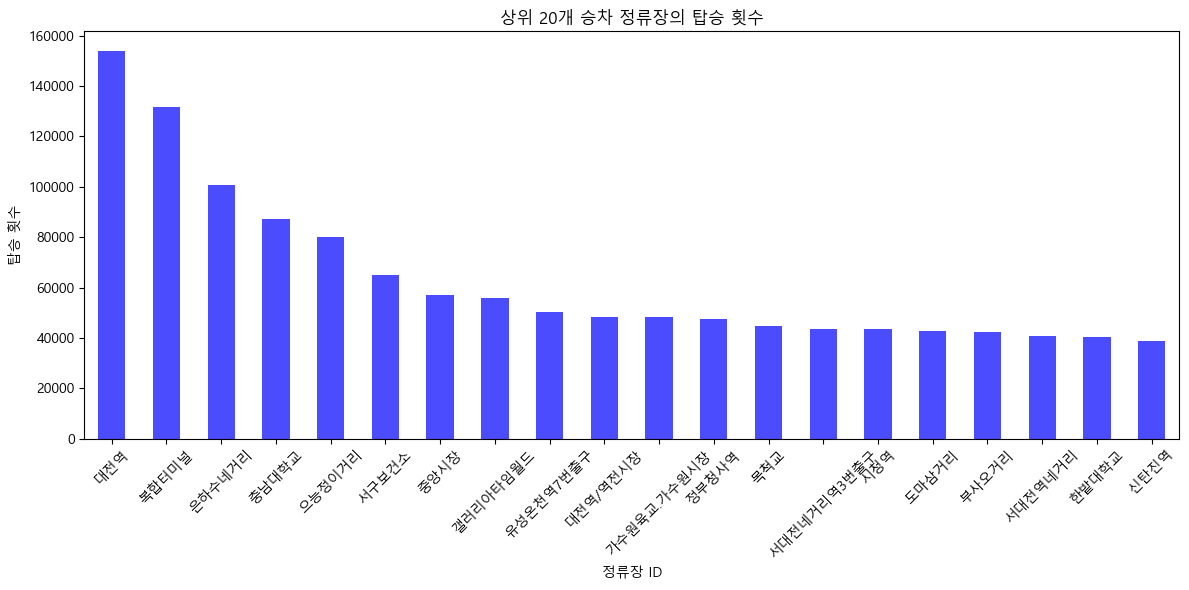

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# 승차 정류장별 탑승 횟수 상위 20개 데이터를 계산합니다.
top_stations = merge_data['GETON_BUS_STTN_ID'].value_counts().head(20)

# 상위 20개 승차 정류장 데이터를 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
top_stations.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('정류장 ID')
plt.ylabel('탑승 횟수')
plt.title('상위 20개 승차 정류장의 탑승 횟수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [150]:
getrouteinfoall.head()

,ALLO_INTERVAL,ALLO_INTERVAL_SAT,ALLO_INTERVAL_SUN,BUSSTOP_CNT,END_NODE_ID,END_STOP_ID,ORIGIN_END,ORIGIN_END_SAT,ORIGIN_END_SUN,ORIGIN_START,ORIGIN_START_SAT,ORIGIN_START_SUN,ROUTE_CD,ROUTE_NO,ROUTE_TP,RUN_DIST_HALF,RUN_TM,START_NODE_ID,START_STOP_ID,TURN_END,TURN_END_SAT,TURN_END_SUN,TURN_NODE_ID,TURN_START,TURN_START_SAT,TURN_START_SUN,TURN_STOP_ID
0,30,30,30,106,8002737.0,42750.0,2230,2230,2230,600,600,630,30300001,1,5,23.6595,70,8002736,42740.0,2220,2220,2205,8007228,600,600,630,82370.0
1,8,9,10,62,9001783.0,44490.0,2230,2230,2230,545,545,545,30300002,2,1,28.7510,93,8001783,44490.0,2255,2255,2255,9002254,545,545,545,20980.0
2,35,35,40,106,8005970.0,82210.0,2210,2210,2210,555,555,600,30300003,3,5,22.6030,70,8005970,82210.0,2240,2240,2230,8070009,610,610,615,45610.0
3,25,25,40,82,8001783.0,44490.0,2235,2235,2230,600,600,600,30300004,5,5,18.0660,90,8001783,44490.0,2230,2230,2230,8005825,600,600,600,82240.0
4,116,116,116,44,9002077.0,41650.0,2040,2040,2040,715,715,715,30300005,11,4,9.8595,55,8002077,41650.0,2130,2130,2130,8002268,600,600,600,40390.0


In [149]:
getstationbyrouteall['BUSSTOP_NM'].value_counts()

BUSSTOP_NM
대전역           56
도마삼거리         52
도마시장          48
정림동           44
계룡시청          44
              ..
서대전고등학교        1
백운초등학교         1
용두사지철당간        1
육거리.산림조합       1
법원.검찰청,경찰청     1
Name: count, Length: 1868, dtype: int64

In [ ]:
merge_data[merge_data['GETON_BUS_STTN_ID']]

In [147]:
merge_data['GETOFF_BUS_STTN_ID'].value_counts().head(20).mean()

65991.5

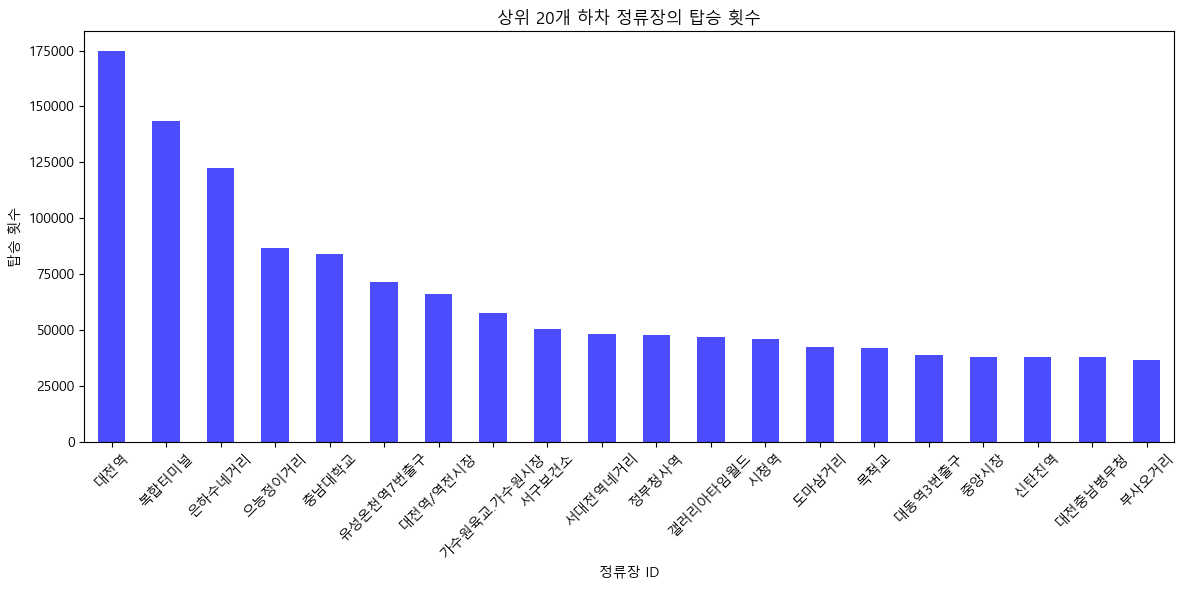

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# 승차 정류장별 하차 횟수 상위 20개 데이터를 계산합니다.
top_stations = merge_data['GETOFF_BUS_STTN_ID'].value_counts().head(20)

# 상위 20개 하차 정류장 데이터를 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
top_stations.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('정류장 ID')
plt.ylabel('탑승 횟수')
plt.title('상위 20개 하차 정류장의 탑승 횟수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


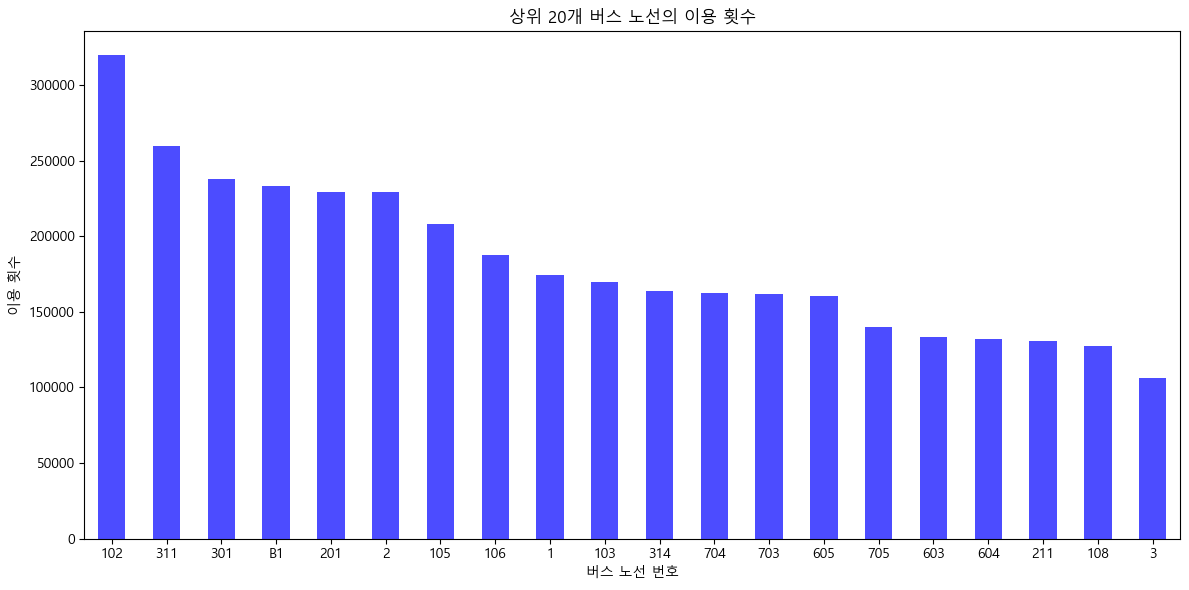

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# 노선 상위 20개 데이터를 계산합니다.
top_route = merge_data['ROUTE_NO'].value_counts().head(20)

# 상위 20개 하차 정류장 데이터를 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
top_route.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('버스 노선 번호')
plt.ylabel('이용 횟수')
plt.title('상위 20개 버스 노선의 이용 횟수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


대전역 지나는 노선 : 2, 512, 616, 705, 711, 802